### P058 数据聚类 - 使用Numpy自己实现聚类

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import norm
import random

In [2]:
np.random.seed(42)

In [3]:
df = pd.read_csv("p058.csv")

In [4]:
df

,x1,x2
0,2.594675,-3.266358
1,1.865450,-3.762144
2,1.299272,-3.166188
3,0.781896,1.714512
4,-0.733158,2.714493
5,2.479724,-2.412872
6,-0.548970,-0.278338
7,5.260191,-3.784969
8,1.594294,2.331512
9,1.376120,2.920965


In [5]:
x1_min = df.x1.min()
x1_max = df.x1.max()

x2_min = df.x2.min()
x2_max = df.x2.max()

In [6]:
x1_min, x1_max, x2_min, x2_max

(-1.541495291463751, 5.260190687298884, -4.201628603933378, 4.805962184758963)

In [7]:
random.uniform(x1_min, x1_max)

2.8716163474758023

In [8]:
centroid_1 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])
centroid_2 = np.array([random.uniform(x1_min, x1_max), random.uniform(x2_min, x2_max)])

In [9]:
centroid_1, centroid_2

(array([ 2.29061195, -4.18963305]), array([3.20304933, 1.38524521]))

In [10]:
data = df.values
data

array([[ 2.59467534, -3.2663579 ],
       [ 1.86544975, -3.76214406],
       [ 1.29927175, -3.16618783],
       [ 0.78189619,  1.71451194],
       [-0.73315846,  2.71449347],
       [ 2.47972356, -2.41287237],
       [-0.5489699 , -0.27833828],
       [ 5.26019069, -3.78496948],
       [ 1.59429425,  2.33151219],
       [ 1.37612008,  2.9209649 ],
       [-0.51326277,  3.67443819],
       [ 1.42843791,  2.65309909],
       [ 3.08262056, -2.23165636],
       [-0.59574102,  3.43107396],
       [ 1.02140747,  2.58469281],
       [ 0.93512419,  4.34121897],
       [ 1.40268169, -4.07064361],
       [ 1.16189327,  2.88104551],
       [ 0.6346358 ,  1.48992406],
       [ 0.98114022,  4.80596218],
       [ 0.97795318,  1.76843278],
       [ 4.08892614, -2.90682729],
       [ 3.51360407, -2.92472641],
       [ 2.16446616, -2.28277776],
       [ 0.21840007,  3.15523793],
       [ 4.771012  , -3.1289664 ],
       [ 2.92105241, -2.35339834],
       [ 3.55505191, -3.66340036],
       [ 1.97293022,

In [11]:
for i in range(10):
    clusters = []
    for point in data:
        centroid_1_dist = norm(centroid_1 - point)
        centroid_2_dist = norm(centroid_2 - point)
        cluster = 1
        if centroid_1_dist > centroid_2_dist:
            cluster = 2
        clusters.append(cluster)
    df["cluster"] = clusters
    
    centroid_1 = [round(df[df.cluster == 1].x1.mean(),3), round(df[df.cluster == 1].x2.mean(),3)]
    centroid_2 = [round(df[df.cluster == 2].x1.mean(),3), round(df[df.cluster == 2].x2.mean(),3)]

In [12]:
centroid_1, centroid_2

([2.663, -3.083], [0.352, 2.502])

### P059 数据聚类 - KMeans实现聚类

#### K-Means算法的思想，对于给定的样本集，按照样本之间的距离大小，将样本集划分为K个簇。让簇内的点尽量紧密的连在一起，而让簇间的距离尽量的大。

In [13]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [14]:
np.random.seed(42)

In [15]:
df = pd.read_csv("p059.csv")

In [16]:
df.head()

,x1,x2
0,-2.776333,-4.166641
1,-1.335879,-1.083934
2,6.507272,-0.158773
3,-0.956622,0.235036
4,-1.558383,-3.969630


In [17]:
kmeans = KMeans(
    n_clusters=3,
    max_iter=100, 
    random_state=42
)

In [18]:
kmeans.fit(df)

KMeans(max_iter=100, n_clusters=3, random_state=42)

In [19]:
kmeans.cluster_centers_

array([[-0.55537629, -0.32971364],
       [ 4.86661316,  0.42352176],
       [-2.15656147, -4.30478556]])

### P060 数据聚类 - 使用KMeans模型实现预估

In [20]:
df.head()

,x1,x2
0,-2.776333,-4.166641
1,-1.335879,-1.083934
2,6.507272,-0.158773
3,-0.956622,0.235036
4,-1.558383,-3.969630


In [21]:
kmeans

KMeans(max_iter=100, n_clusters=3, random_state=42)

In [22]:
y_kmeans = kmeans.predict(df)

In [23]:
y_kmeans[:10]

array([2, 0, 1, 0, 2, 0, 1, 2, 1, 1])

In [24]:
y_kmeans.shape

(1000,)

In [25]:
df.shape

(1000, 2)

In [26]:
df["y_kmeans"] = y_kmeans

In [27]:
df

,x1,x2,y_kmeans
0,-2.776333,-4.166641,2
1,-1.335879,-1.083934,0
2,6.507272,-0.158773,1
3,-0.956622,0.235036,0
4,-1.558383,-3.969630,2
...,...,...,...
995,-2.082539,-4.016371,2
996,4.917095,3.206841,1
997,-3.683461,-5.141359,2
998,-3.460697,-3.756673,2


### P061 061 数据聚类 - 评价指标之WCSS

In [28]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [29]:
np.random.seed(42)

In [30]:
df = pd.read_csv("./p061.csv")

In [31]:
df.head(3)

,x1,x2
0,-6.645730,5.470461
1,-4.390559,-5.055149
2,-4.666211,-5.390080


In [32]:
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
wcss

[23414.040458695985,
 7734.886635126092,
 4282.137026938603,
 3851.546834210853,
 3442.659536944271,
 3049.7421351793673,
 2716.8660768161135,
 2472.8024581628047]

### P062 数据聚类 - 肘部法则选择聚类数目

In [33]:
import matplotlib.pyplot as plt

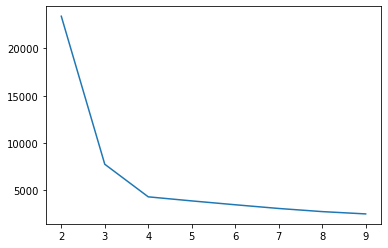

In [34]:
plt.plot(
    list(range(2, 10)),
    wcss
)

### P063 数据聚类 - 层次聚类AgglomerativeClustering

In [35]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

In [36]:
df = pd.read_csv("./p063.csv")

In [37]:
df.head()

,x1,x2
0,-2.486532,7.025770
1,-3.522549,8.578303
2,-2.982040,7.998514
3,-2.135276,6.255888
4,2.762504,4.210918


In [38]:
cluster = AgglomerativeClustering(n_clusters=2)

In [39]:
cluster.fit_predict(df)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,

In [40]:
df["cluster"] = cluster.labels_

In [41]:
df

,x1,x2,cluster
0,-2.486532,7.025770,0
1,-3.522549,8.578303,0
2,-2.982040,7.998514,0
3,-2.135276,6.255888,0
4,2.762504,4.210918,1
...,...,...,...
495,-1.684640,6.384198,0
496,3.909988,1.434175,1
497,4.350496,-0.082984,1
498,-1.295743,6.086787,0


### P064 数据聚类 - 层次聚类的重要属性

In [42]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

In [43]:
df = pd.read_csv("./p063.csv")

In [44]:
df.head()

,x1,x2
0,-2.486532,7.025770
1,-3.522549,8.578303
2,-2.982040,7.998514
3,-2.135276,6.255888
4,2.762504,4.210918


In [45]:
cluster = AgglomerativeClustering(
    n_clusters=2,
    linkage="complete",
    affinity="manhattan"
)

In [46]:
cluster.fit_predict(df)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,

In [47]:
df = pd.DataFrame(df, columns=['x1', 'x2'])
df["cluster"] = cluster.labels_

In [48]:
df.head()

,x1,x2,cluster
0,-2.486532,7.025770,0
1,-3.522549,8.578303,0
2,-2.982040,7.998514,0
3,-2.135276,6.255888,0
4,2.762504,4.210918,1


### P065 数据聚类 - DBSCAN聚类算法

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv("./p065.csv")

In [3]:
df.head()

,x1,x2
0,-6.730717,5.548132
1,-4.613187,-5.144937
2,-4.833709,-5.412881
3,3.160670,0.558723
4,3.400393,-0.225236


In [4]:
cluster = DBSCAN(eps=0.6, min_samples=7)

In [5]:
cluster.fit(df)

DBSCAN(eps=0.6, min_samples=7)

In [6]:
df["cluster"] = cluster.labels_

In [7]:
df.head()

,x1,x2,cluster
0,-6.730717,5.548132,0
1,-4.613187,-5.144937,1
2,-4.833709,-5.412881,1
3,3.160670,0.558723,2
4,3.400393,-0.225236,2


### P066 数据聚类 - DBSCAN聚类算法的异常点

In [8]:
df = pd.read_csv("./p065.csv")

In [9]:
df.head()

,x1,x2
0,-6.730717,5.548132
1,-4.613187,-5.144937
2,-4.833709,-5.412881
3,3.160670,0.558723
4,3.400393,-0.225236


In [10]:
cluster = DBSCAN(eps=0.6, min_samples=7)

In [11]:
cluster.fit(df)

DBSCAN(eps=0.6, min_samples=7)

In [12]:
df["cluster"] = cluster.labels_

In [13]:
df.head()

,x1,x2,cluster
0,-6.730717,5.548132,0
1,-4.613187,-5.144937,1
2,-4.833709,-5.412881,1
3,3.160670,0.558723,2
4,3.400393,-0.225236,2


In [14]:
df["cluster"].value_counts()

 0    449
 1    232
 2    231
-1     88
Name: cluster, dtype: int64